In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)


In [2]:
df1 = pd.read_csv("C:/Users/BusinessComputers.in/Desktop/Bengaluru_House_Data.csv")

In [3]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df1.shape

(13320, 9)

In [5]:
df1.groupby("area_type")["area_type"].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df2  = df1.drop(['area_type','availability','society','balcony'], axis = 'columns')

In [7]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df3 = df2.dropna()

In [10]:
df3.head()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
df3.shape

(13246, 5)

In [12]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [13]:
df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\BusinessComputers.in\AppData\Local\Temp\ipykernel_7624\3603722699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk']= df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [14]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df3[df3['bhk']>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [16]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [19]:
def convert_sqft_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1])/2)
    try:
        return float(x)
    except:
        return None

In [20]:
df4 = df3.copy()

df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_num)

In [21]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [22]:
df5 = df4.copy()
df5['price_per_sqft']  = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [23]:
len(df5.location.unique())

1304

In [24]:
df5.location =  df5.location.apply(lambda x: x.strip())
location_stats  = df5.groupby('location')['location'].agg('count')


In [25]:
location_less_10  = location_stats[location_stats<=10]
len(df5.location.unique())

1293

In [26]:

df5.location = df5['location'].apply(lambda x: 'other' if x in location_less_10 else x )

In [27]:
len(df5.location.unique())

242

In [28]:
df5[df5.total_sqft/df5.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [29]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [30]:
df5.shape

(13246, 7)

In [31]:
df6.shape

(12502, 7)

In [32]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [33]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out =  pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out
    

In [34]:
df7 = remove_pps_outlier(df6)
df7.shape

(10231, 7)

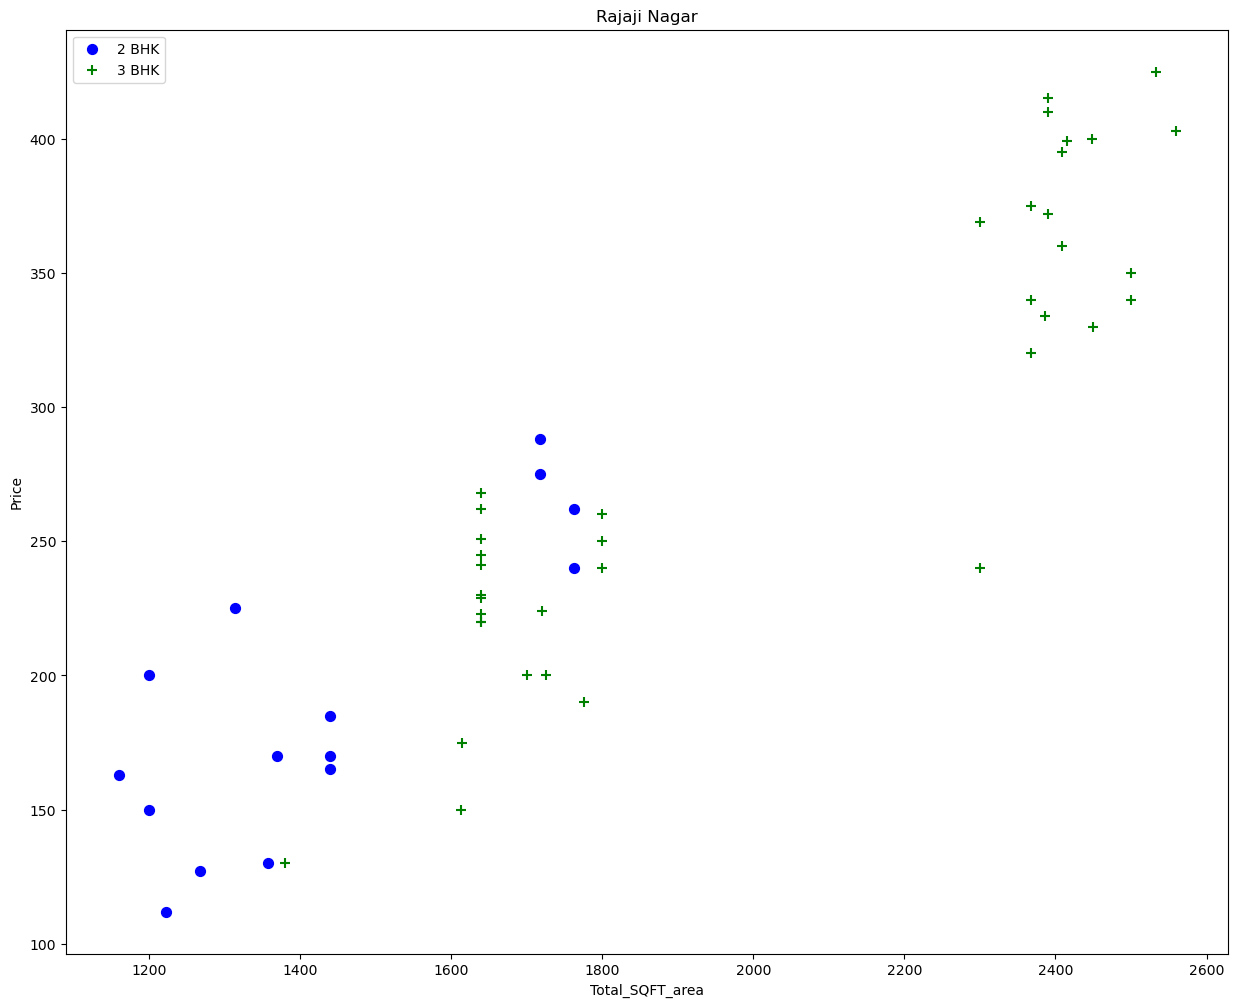

In [35]:
def plt_scatter(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (15,12)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label = '2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker = '+', color='green',label = '3 BHK', s=50)
    plt.legend()
    plt.title(location)
    plt.xlabel('Total_SQFT_area')
    plt.ylabel('Price')
    
    
plt_scatter(df7,'Rajaji Nagar')

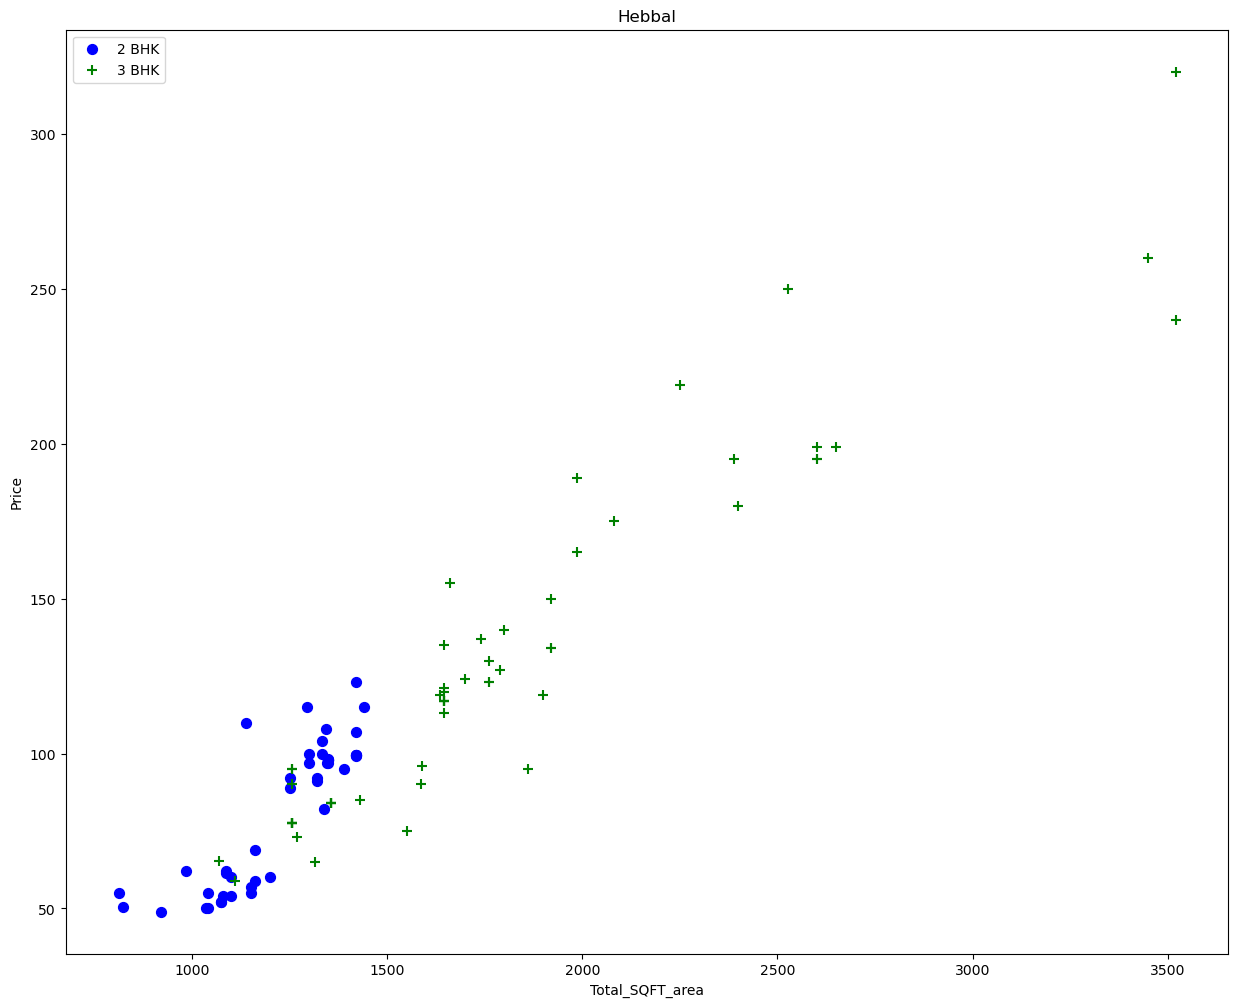

In [36]:

    
plt_scatter(df7,'Hebbal')

In [37]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location , location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk , bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk , bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [38]:
df8 = remove_bhk_outliers(df7)


In [39]:
df8.shape

(7326, 7)

Text(0, 0.5, 'Count')

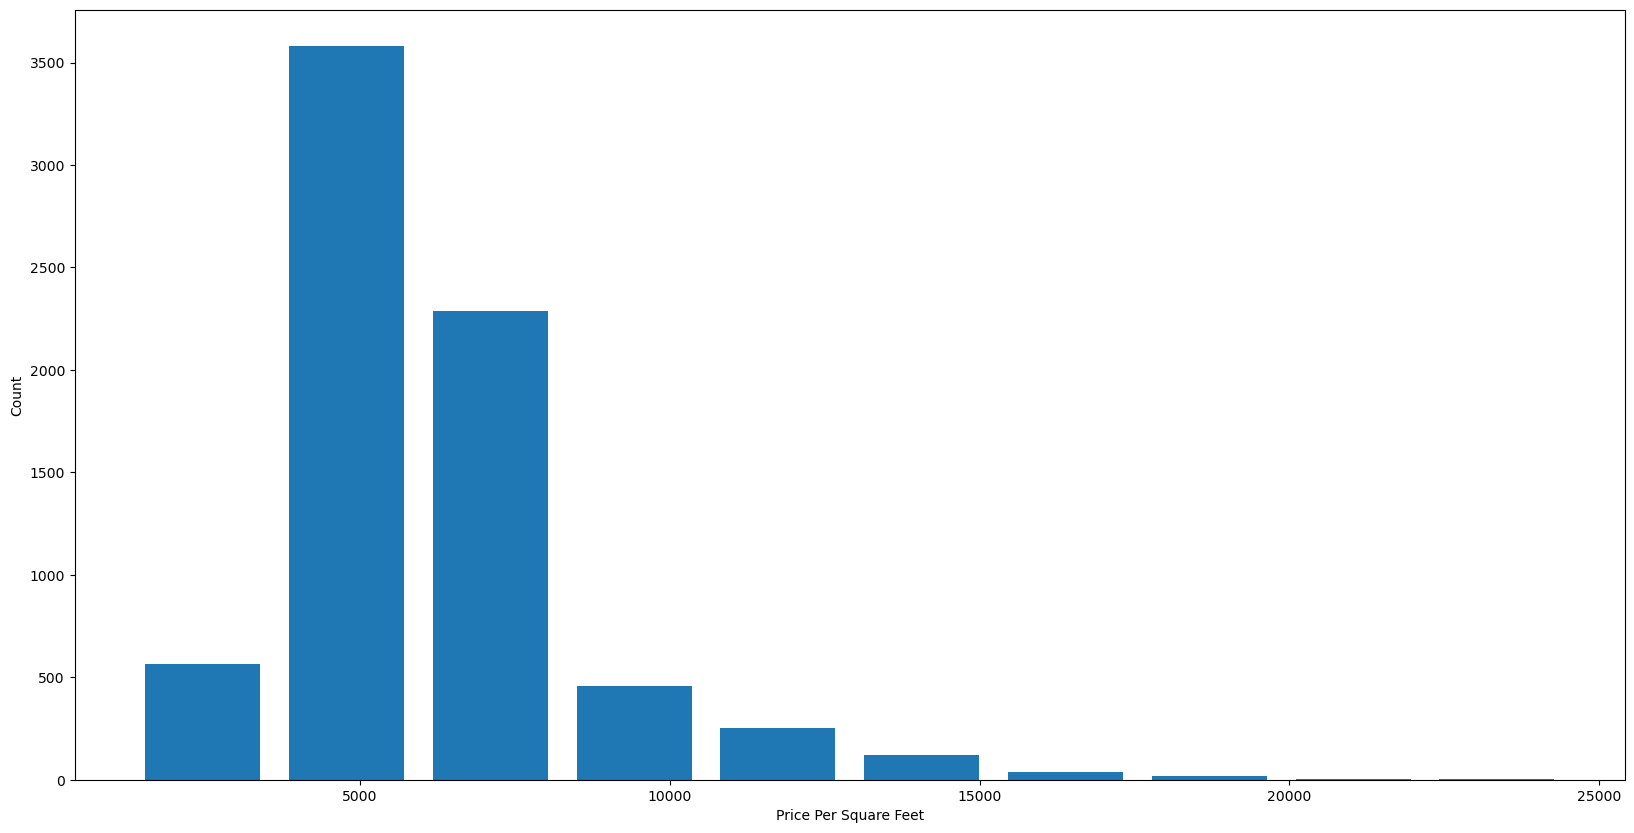

In [40]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [41]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

Text(0, 0.5, 'count')

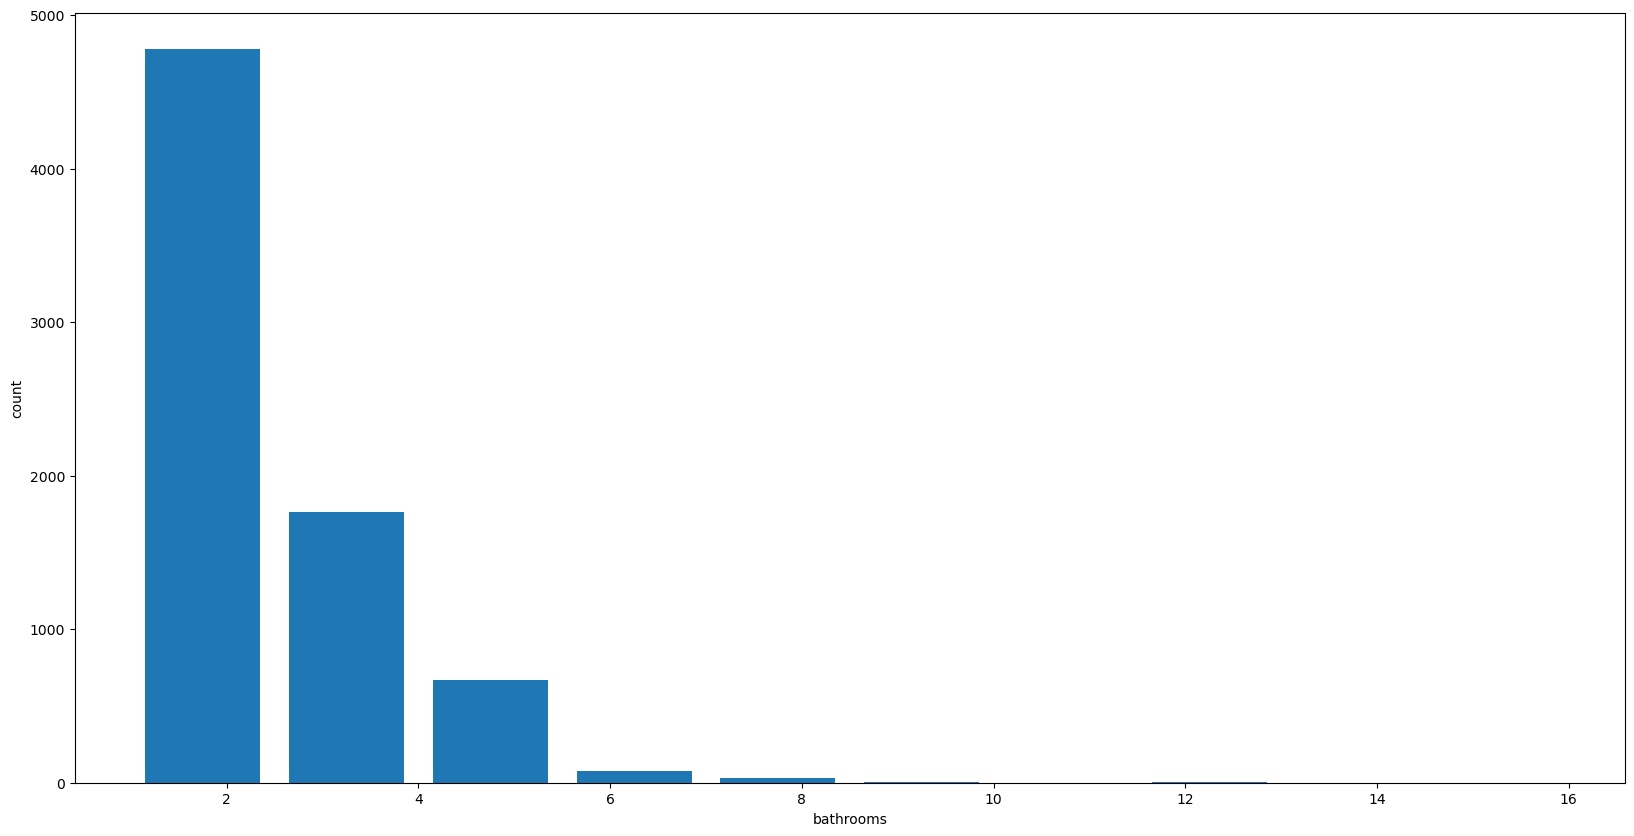

In [42]:
plt.hist(df8.bath,rwidth =0.8)
plt.xlabel('bathrooms')
plt.ylabel('count')

In [43]:
df9 = df8[df8.bhk+2>df8.bath]

In [44]:
df9.shape

(7252, 7)

In [45]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(3)


,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [46]:
dummies = pd.get_dummies(df10.location)

In [47]:
df11= pd.concat([df10,dummies.drop('other', axis ='columns')],axis = 'columns')

In [48]:
df12= df11.drop('location',axis = 'columns')

In [49]:
df12.shape

(7252, 245)

In [50]:
X = df12.drop('price', axis = 'columns')

In [51]:
y = df12.price

In [52]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X , y, test_size = 0.2 ,random_state=10)

In [53]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(Xtrain, ytrain)
lr_clf.score(Xtest,ytest)

0.8515492485425846

In [57]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2 ,random_state = 0)
cross_val_score(LinearRegression(),X,y,cv=cv)


array([0.83419256, 0.84066871, 0.85637292, 0.84326517, 0.84613103])

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor


def find_best_algo(X,y):
    algos = {
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True, False]
            }
            
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1, 2],
                'selection':['random', 'cyclic']
            }
            
        },
        'decision_tree':{
            'model':LinearRegression(),
            'params':{
                'criterion':['mse', 'friedman_mse'],
                'splitter':['best', 'random']            }
            
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2 ,random_state = 0)

    for algo_name, config in algos.items():
        gs  = GridSearchCV(config['model'],config['params'], cv =cv, return_train_score = False)
        gs.fit(X,y)
        scores.append({
            'best_model':algo_name,
            'best_score': gs.best_score_,
            'best_params':gs.best_params_
        })
        return pd.DataFrame(scores, columns =['best_model', 'best_score', 'best_params'])

In [65]:
find_best_algo(X,y)

C:\Users\BusinessComputers.in\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\BusinessComputers.in\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline

,model,best_score,best_params
0,linear_regression,0.844126,{'normalize': True}


In [67]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[bhk] = bhk
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_clf.predict([x])[0]

In [68]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [69]:
predict_price('1st Block Jayanagar',2000,2,2)

C:\Users\BusinessComputers.in\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


281.6038601376873

In [70]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\BusinessComputers.in\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.82117905156167

In [71]:
import pickle
with open('banglore_price_prediction_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [72]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json','w') as f:
    f.write(json.dumps(columns))